In [1]:
import numpy as np
import torch
import pandas as pd
import os
import tqdm
import sys
# sys.path.append('../')
# from src.metrics import evaluate_prediction
# import pathlib

df = pd.read_csv("all_sample_metrics.csv", index_col=0)
df

,top_1_heavy_correctness,top_1_correctness,top_1_heavy_coord_rmse,top_1_coord_rmse,top_1_unsigned_coords_rmse,top_1_moments_rmse,top_5_heavy_correctness,top_5_correctness,top_5_heavy_coord_rmse,top_5_coord_rmse,...,top_10_coord_rmse,top_10_unsigned_coords_rmse,top_10_moments_rmse,method,task,n_atoms,n_heavy_atoms,n_constrained_coords,n_unconstrained_coords,n_unconstrained_heavy_coords
0,0.0,0.0,1.456176,1.590869,0.353021,32.839909,0.0,0.0,1.144484,1.577369,...,1.466680,0.353021,8.442506,GA,QM9,20,9,27,33,0
1,0.0,0.0,0.905220,1.179918,0.683683,34.308926,0.0,0.0,0.683340,1.179918,...,1.023784,0.600493,16.399570,GA,QM9,23,9,27,42,0
2,0.0,0.0,1.010484,1.407942,0.395307,15.056948,0.0,0.0,0.924328,1.281620,...,1.021579,0.395307,15.056948,GA,QM9,21,9,27,36,0
3,0.0,0.0,1.229234,1.495409,0.985125,37.732033,0.0,0.0,0.783704,1.066708,...,1.066708,0.902675,21.588402,GA,QM9,23,9,27,42,0
4,1.0,0.0,0.048065,0.800964,0.678022,1.598898,1.0,0.0,0.048065,0.800964,...,0.800964,0.627920,1.598898,GA,QM9,17,8,24,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29199,0.0,0.0,2.081979,1.985717,0.049545,11.966662,0.0,0.0,1.670698,1.550990,...,1.363692,0.049545,11.966662,DDPM,GEOM-C,38,25,47,67,28
29200,0.0,0.0,2.264010,2.739421,0.024301,56.234398,0.0,0.0,1.818433,1.972233,...,1.459334,0.024301,56.234398,DDPM,GEOM-C,45,27,49,86,32
29201,0.0,0.0,1.157114,1.245941,0.007491,7.578352,1.0,1.0,0.018197,0.032340,...,0.032340,0.007491,4.261432,DDPM,GEOM-C,31,19,33,60,24
29202,1.0,1.0,0.007862,0.014914,0.003756,1.324095,1.0,1.0,0.007509,0.014914,...,0.014914,0.003756,0.762684,DDPM,GEOM-C,41,20,46,77,14


<AxesSubplot: >

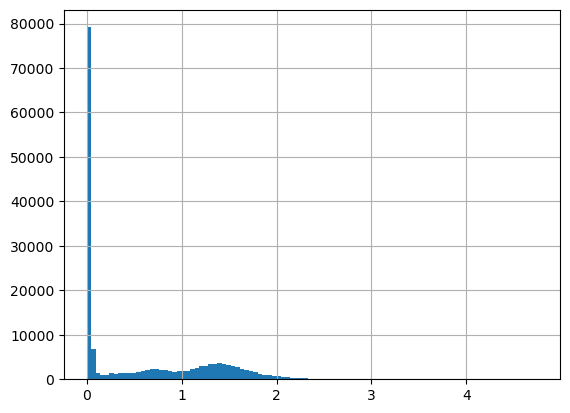

In [17]:
def make_hist(feature):
    return df[feature][df[feature] < 10].hist(bins=100)

make_hist('top_1_unsigned_coords_rmse')

In [18]:
for method in ["GA", "DDPM"]:
    for task in ["QM9", "QM9-C", "GEOM", "GEOM-C"]:
        a = df[(df.method == method) & (df.task == task)]
        print(f'& {task}', end='')
        for metric in ["top_1_correctness", "top_5_correctness", "top_10_correctness", "top_1_heavy_correctness", "top_5_heavy_correctness", "top_10_heavy_correctness"]:
            val = '%#.3g' % (a[metric].mean() * 100)
            print(f' & {val}', end='')
        print(' \\\\')


& QM9 & 7.33 & 12.4 & 15.0 & 25.4 & 39.6 & 46.4 \\
& QM9-C & 0.127 & 0.225 & 0.337 & 0.262 & 0.584 & 0.914 \\
& GEOM & 0.0308 & 0.0377 & 0.0377 & 0.158 & 0.253 & 0.318 \\
& GEOM-C & 0.00342 & 0.00685 & 0.00685 & 0.00342 & 0.00685 & 0.0103 \\
& QM9 & 99.9 & 99.9 & 99.9 & 99.9 & 100. & 100. \\
& QM9-C & 91.3 & 93.1 & 93.8 & 92.6 & 94.8 & 95.8 \\
& GEOM & 98.9 & 99.2 & 99.2 & 99.4 & 99.5 & 99.5 \\
& GEOM-C & 32.6 & 35.8 & 37.0 & 37.0 & 41.6 & 42.9 \\
